# PLA

This notebook is intended to create a simple perceptron to solve a binary classification problem with synthetic data generation

## Dataset

Each class will have exactly 250 data points and the seed should be set to 314.

Let's define the first class $X_1$:
- $X_1^1$ is a normal distribution with a mean of -3 and a standard deviation of 3
- $X_1^2$ is a normal distribution with a mean of -3 and a standard deviation of 2

The second class $X_2$ is defined as follows:
- $X_2^1$ is a normal distribution with a mean of 5 and a standard deviation of 1.5
- $X_2^2$ is a normal distribution with a mean of 0 and a standard deviation of 1

The class $X_1$ will have the label "+1" meanwhile $X_2$ will have the label "-1"

In [740]:
import numpy as np

# numbero of points 
N = 250

# setting the seed
np.random.seed(314)

# generate 1st class
X1_1 = np.random.normal(loc=-3, scale=3, size=N)
X1_2 =  np.random.normal(loc=-3, scale=2, size=N)

# generate 2nd class
X2_1 = np.random.normal(loc=5, scale=1.5, size=N)
X2_2 =  np.random.normal(loc=5, scale=1, size=N)

# set up the labels
Y1 = np.ones(N)     # class 1
Y2 = - np.ones(N)   # class 2

Plot the generated dataset using the <tt>scatter</tt> function

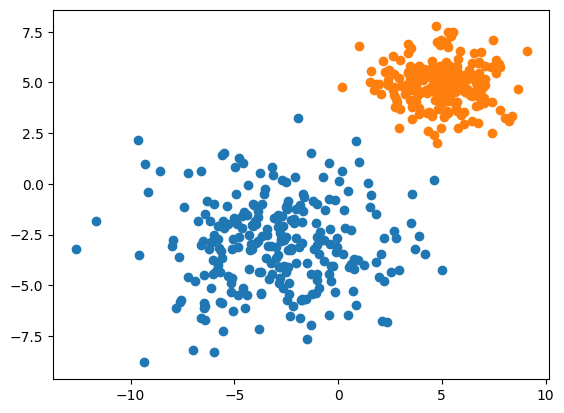

In [741]:
import matplotlib.pyplot as plt

plt.scatter(X1_1, X1_2)
plt.scatter(X2_1, X2_2)

Create the dataset $X$ by concatenating $X_1$ and $X_2$ and the bias $X_0$. Do the same to create the labels $Y$

In [742]:
# create the bias
X0 = np.ones(2 * N)

# create the two column features X1 and X2
X1 = np.concatenate((X1_1, X2_1))
X2 = np.concatenate((X1_2, X2_2))


# create dataset X
# X = X0 | X1 | X2
X = np.stack((X0, X1, X2), axis=1)

# create label vector
Y = np.concatenate((Y1, Y2))

## Learning

Set up the vector of weight $w$ as a normal distribution with mean 0 and standard deviation 3 then train the Perceptron model using the basic __PLA__ algorithm, implementing the following requirements
- set parameter $\eta$ to $10^{-4}$
- set the maximum number of epochs to 500

In addition, note that we want to keep track of the errors per epoch. Store in a vector named <tt>errors_epoch</tt> the number of misclassified objects for each epoch.


In [743]:
# generate the weight vector
w = np.random.normal(loc=0, scale=3, size=X.shape[1])

# learning rate
eta = 1e-4

# maximum number of epochs
max_epochs = 500
current_epoch = 0

# vector of errors
errors_epoch = np.zeros(max_epochs)

# start training
while (current_epoch < max_epochs):
    
    # compute number of errors
    num_errors = 0
    
    for i in range(Y.shape[0]):
        output = np.sign(np.dot(X[i, :], w))
        
        if (output != Y[i]):
            w = w + eta * (X[i, :] * Y[i])
            num_errors += 1
    
    errors_epoch[current_epoch] = num_errors
    current_epoch += 1

Now draw the plots containing the solution found by the PLA and the plot containing the errors per epoch

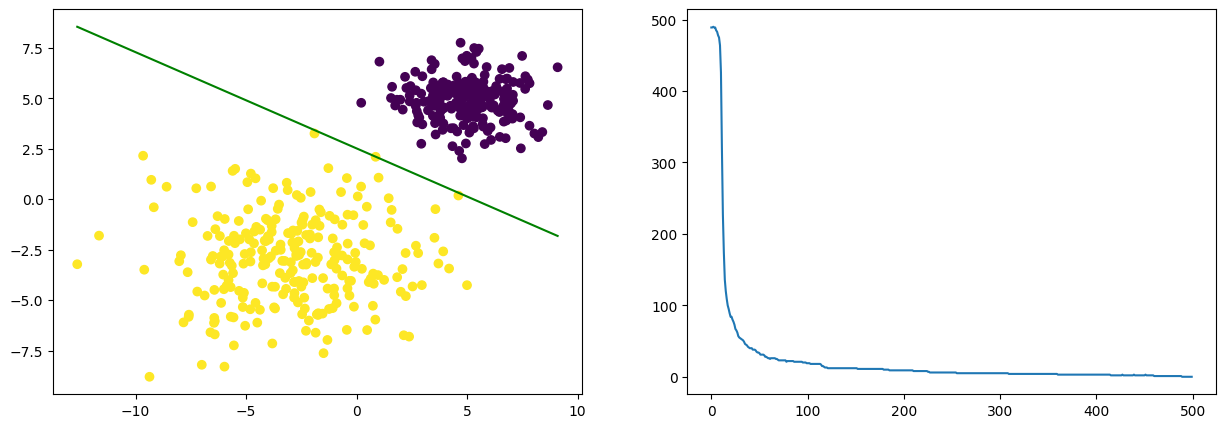

In [744]:
# creates two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey = False)

# plot initial dataset
axs[0].scatter(X[:, 1], X[:, 2], c=Y)

# plots the solution
axs[0].plot([np.min(X1_1), np.max(X2_1)],
         [np.min(X1_1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X2_1) * (-w[1]/w[2]) - w[0]/w[2]],
         color = 'green')

# plots the errors
axs[1].plot(range(max_epochs), errors_epoch)